In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# Exercise 1

In this exercise we want to plot the exact solution of the equation
\begin{align}
    \frac{d^2z}{dt} + 3 \frac{dz}{dt} + 3z
    & = 0
\end{align}
where the initial conditions are $z(0) = 1$ and $\frac{dz}{dt}(0) = 1$.
The particular solution is
\begin{align}
        z(t)
        & = e^{-\frac{3}{2}t}\left( \cos(\frac{\sqrt{3}}{2}t)+\sqrt{3}\sin(\frac{\sqrt{3}}{2}t)\right)
\end{align}
We will also plot the approximate solution by using Euler Method. For that we first transform the 2nd order equation into a system of equations of first order.
The system is
\begin{align}
\begin{cases}
\frac{dz}{dt} & = y\\
\frac{dy}{dt} & = -3z - 3y
\end{cases}
\end{align}
The Euler Method is given by the following formula
\begin{align}
\begin{cases}
z_{n+1} & = z_{n} + hy_{n}\\
y_{n+1} & = y_{n} - h(3y_{n}+3z_{n})
\end{cases}
\end{align}

In [174]:
u1=0
u2=10
T = np.linspace(u1,u2,100)
Z_t = np.exp(-T*(3/2))*(np.cos(T*(np.sqrt(3)/2))+np.sqrt(3)*np.sin(T*(np.sqrt(3)/2)))

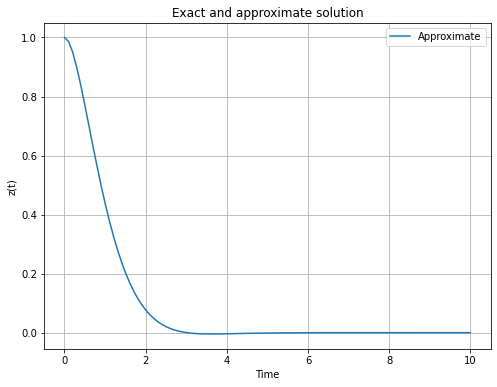

In [176]:
plt.figure(figsize=(8,6))

plt.plot(T,Z_t)
plt.title('Exact and approximate solution')
plt.legend(['Approximate','Exact'])
plt.xlabel("Time")
plt.ylabel("z(t)")

plt.grid()
plt.show()

We use the approximate solution to compare if the two solutions (exact and approximate) are the same.

# Exercise 4

# Exercise 4.1

In this part, we want to solve numerically the harmonic oscillator equation with damping
\begin{align} \label{eqq111}
    \frac{d^2x}{dt^2}
    & = -x - \beta \frac{dx}{dt}\\
    x(0) & = 1\\
    \frac{dx}{dt}(0) & = 1
\end{align}
The first thing is to transform the equation into the equation of first order. We get
<!-- \begin{align*}
    y
    & = \frac{dx}{dt}\\
    \frac{dy}{dt}
    & = \frac{d^2x}{dt^2}\\
    & = - x - \beta y
\end{align*}
Therefore, -->
\begin{align} \label{eqq1111}
    \begin{cases}
    \frac{dx}{dt}
    & = y\\
    \frac{dy}{dt}
    & = - x - \beta y \simeq \mbox{ acceleration: a}\\
    \end{cases}
\end{align}
Where the initial conditions are:
\begin{align}
    x(0) & = 1\\
    y(0) & = 1
\end{align}
To approximate the solution, we need Verlet/Leapfrog with Damping algorithm
\begin{align*}
    x_{n+1}
    & = x_n + \Delta t v_n + \frac{1}{2} \Delta t^2 a_n\\
    \hat{v_{n+1}}
    & = v_n + \frac{1}{2} \Delta t[ a_n + a(x_{n+1},v_n+\Delta t a_n, t_{n+1})]\\
    v_{n+1}
    & = v_n + \frac{1}{2} \Delta t[ a_n + a(x_{n+1},\hat{v_{n+1}}, t_{n+1})]
\end{align*}
In this case,
\begin{align*}
    a_n
    & = - x_n - \beta y_n\\
    a(x_{n+1},v_n+\Delta t a_n, t_{n+1})
    & = x_{n+1} - \beta(v_n+\Delta t a_n)\\
    a(x_{n+1},\hat{v_{n+1}}, t_{n+1})
    & = x_{n+1} - \beta\hat{v_{n+1}}
\end{align*}

In [70]:
def acceleration(x,y,t,b):
    return -x-b*y

In [2]:
def VDamp(t,f,beta):
    x = np.ones(len(t))
    y = np.ones(len(t))
    i = 0
    while i<(len(t)-1):
        x[i+1] = x[i] + (t[i+1]-t[i])*y[i] + (1/2)*(h**2)*f(x[i],y[i],t[i],beta)
        y_hat  = y[i] + ((t[i+1]-t[i])/2)*(f(x[i],y[i],t[i],beta) + f(x[i+1],y[i] + (t[i+1]-t[i])*f(x[i],y[i],t[i],beta),t[i+1],beta))
        y[i+1] = y[i] + ((t[i+1]-t[i])/2)*(f(x[i],y[i],t[i],beta)+f(x[i+1],y_hat,t[i+1],beta))
        i += 1 
    return x,y

In [2]:
a = 0
b = 30
h = 0.01
N = int((b-a)/h)
t = np.linspace(a,b,N+1)

# Overdamp $\beta > 2$ and Underdamp $0<\beta < 2$ System

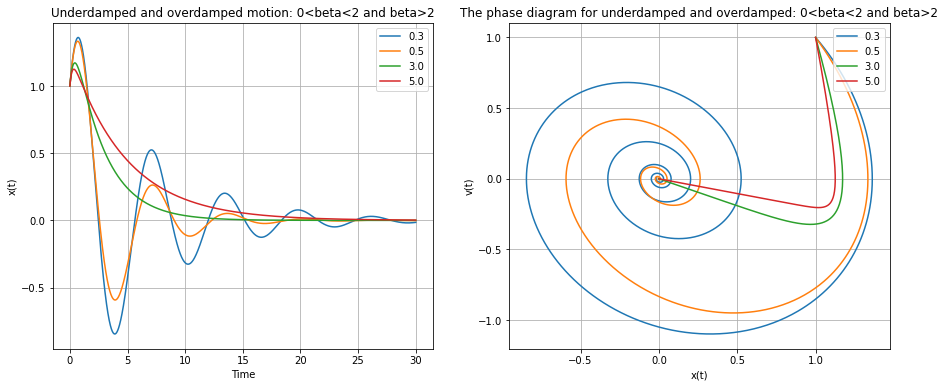

In [187]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
for i in np.array([0.3,0.5,3,5]):
    x,v = VDamp(t,acceleration,i)
    ax1.plot(t,x,label=i)
    ax1.legend(loc="upper right")
    ax2.plot(x,v,label=i)
    ax2.legend(loc="upper right")

ax1.set_title('Underdamped and overdamped motion: 0<beta<2 and beta>2')
ax2.set_title('The phase diagram for underdamped and overdamped: 0<beta<2 and beta>2')
ax1.set_xlabel("Time")
ax1.set_ylabel("x(t)") 
ax2.set_xlabel("x(t)")
ax2.set_ylabel("v(t)")



ax1.grid()
ax2.grid()

# Exercise 4.2

\begin{align} \label{eqq111}
    \frac{d^2x}{dt^2}
    & = -x + \beta \sin(\frac{dx}{dt})
\end{align}
The first thing is to transform the equation into the equation of first order. We get
<!-- \begin{align*}
    y
    & = \frac{dx}{dt}\\
    \frac{dy}{dt}
    & = \frac{d^2x}{dt^2}\\
    & = - x - \beta y
\end{align*}
Therefore, -->
\begin{align} \label{eqq1111}
    \begin{cases}
    \frac{dx}{dt}
    & = y\\
    \frac{dy}{dt}
    & = - x + \beta \sin(y) \simeq \mbox{ acceleration: a}\\
    \end{cases}
\end{align}

In [150]:
def acceleration1(x,y,t,b):
    return -x+b*np.sin(y)

# Case of $\beta > 0$

In that case we notice that the oscillator will never go at the rest. The phase diagram shows that the trajectories don't converge towards the point $(0,0)$.

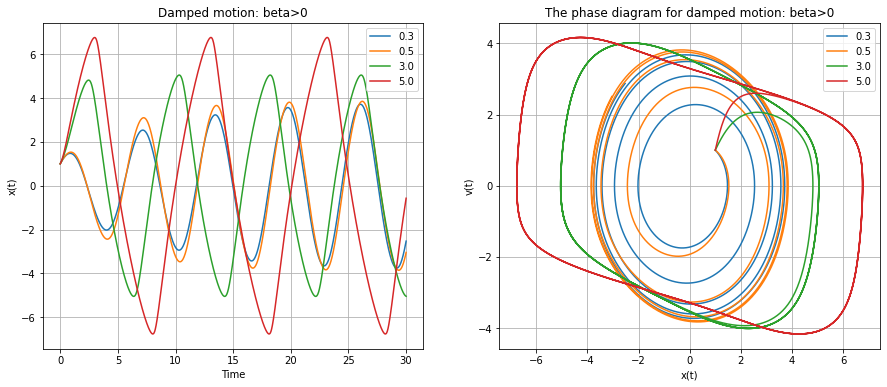

In [193]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
for i in np.array([0.3,0.5,3,5]):
    x,v = VDamp(t,acceleration1,i)
    ax1.plot(t,x,label=i)
    ax1.legend(loc="upper right")
    ax2.plot(x,v,label=i)
    ax2.legend(loc="upper right")

ax1.set_title('Damped motion: beta>0')
ax2.set_title('The phase diagram for damped motion: beta>0')
ax1.set_xlabel("Time")
ax1.set_ylabel("x(t)") 
ax2.set_xlabel("x(t)")
ax2.set_ylabel("v(t)")



ax1.grid()
ax2.grid()

# Overdamp $\beta < -2$ and Underdamp $0>\beta > -2$ System

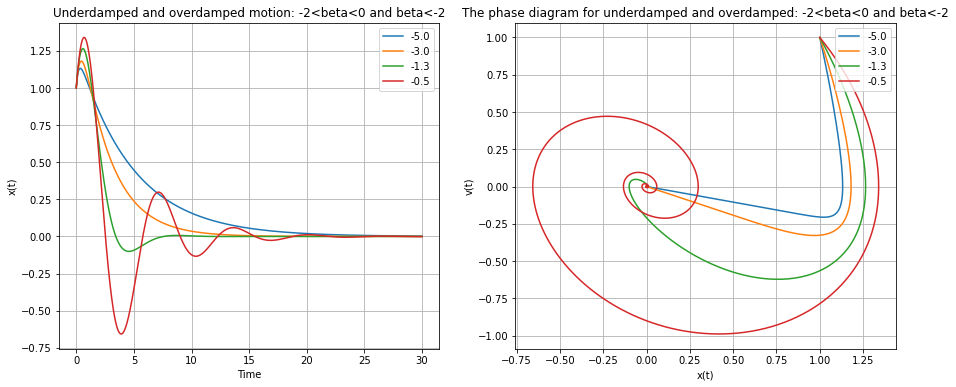

In [192]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
for i in np.array([-5,-3,-1.3,-0.5]):
    x,v = VDamp(t,acceleration1,i)
    ax1.plot(t,x,label=i)
    ax1.legend(loc="upper right")
    ax2.plot(x,v,label=i)
    ax2.legend(loc="upper right")

ax1.set_title('Underdamped and overdamped motion: -2<beta<0 and beta<-2')
ax2.set_title('The phase diagram for underdamped and overdamped: -2<beta<0 and beta<-2')
ax1.set_xlabel("Time")
ax1.set_ylabel("x(t)") 
ax2.set_xlabel("x(t)")
ax2.set_ylabel("v(t)")

# np.array([-2,-1.5,-1,-0.5])

ax1.grid()
ax2.grid()

In [4]:
def acceleration2(x,y,t,b):
    return -9*x-b*y

In [12]:
# fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# x,v = VDamp(t,acceleration2,6)
# ax1.plot(t,x,label=9)
# ax1.legend(loc="upper right")
# ax2.plot(x,v,label=9)
# ax2.legend(loc="upper right")

# ax1.set_title('Underdamped and overdamped motion: -2<beta<0 and beta<-2')
# ax2.set_title('The phase diagram for underdamped and overdamped: -2<beta<0 and beta<-2')
# ax1.set_xlabel("Time")
# ax1.set_ylabel("x(t)") 
# ax2.set_xlabel("x(t)")
# ax2.set_ylabel("v(t)")

# # np.array([-2,-1.5,-1,-0.5])

# ax1.grid()
# ax2.grid()

In [3]:
def VDamp11(t,x0,y0,f,beta):
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = x0
    y[0] = y0
    i = 0
    while i<(len(t)-1):
        x[i+1] = x[i] + (t[i+1]-t[i])*y[i] + (1/2)*(h**2)*f(x[i],y[i],t[i],beta)
        y_hat  = y[i] + ((t[i+1]-t[i])/2)*(f(x[i],y[i],t[i],beta) + f(x[i+1],y[i] + (t[i+1]-t[i])*f(x[i],y[i],t[i],beta),t[i+1],beta))
        y[i+1] = y[i] + ((t[i+1]-t[i])/2)*(f(x[i],y[i],t[i],beta)+f(x[i+1],y_hat,t[i+1],beta))
        i += 1 
    return x,y

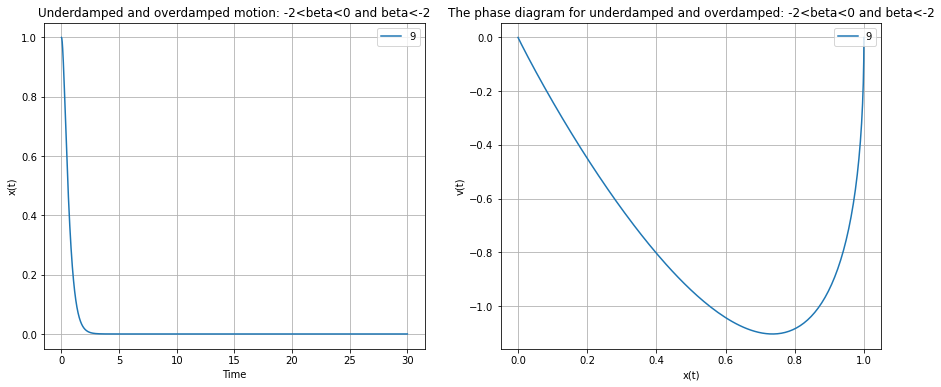

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
x,v = VDamp11(t,1,1,acceleration2,6)
x1,v1 = VDamp11(t,1,0,acceleration2,6)
ax1.plot(t,x)
ax1.legend(loc="upper right")
ax2.plot(x,v)
ax2.legend(loc="upper right")

ax1.set_title('Underdamped and overdamped motion: -2<beta<0 and beta<-2')
ax2.set_title('The phase diagram for underdamped and overdamped: -2<beta<0 and beta<-2')
ax1.set_xlabel("Time")
ax1.set_ylabel("x(t)") 
ax2.set_xlabel("x(t)")
ax2.set_ylabel("v(t)")

# np.array([-2,-1.5,-1,-0.5])

ax1.grid()
ax2.grid()